## Limitations of R-squared in Regression Model Evaluation:
Slide 1: Introduction to R-squared (R²)

Understanding R-squared (R²) in Regression Analysis

R-squared, also known as the coefficient of determination, is a statistical measure used to assess the goodness of fit of a regression model. It represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). While R-squared is widely used, it has limitations that can lead to misinterpretation of model performance.

    

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r2 = r2_score(y, model.predict(X))
print(f"R-squared: {r2:.4f}")

R-squared: 0.6000


Slide 2: Limitation 1 - Sensitivity to Sample Size

R-squared and Sample Size

R-squared tends to increase as more variables are added to the model, even if these variables don't significantly improve the model's predictive power. This can lead to overfitting, especially with small sample sizes. To demonstrate this, we'll create a function that generates random data and calculates R-squared for different sample sizes.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def r2_vs_sample_size(n_samples, n_features):
    X = np.random.rand(n_samples, n_features)
    y = np.random.rand(n_samples)
    model = LinearRegression().fit(X, y)
    return r2_score(y, model.predict(X))

sample_sizes = [10, 50, 100, 500, 1000]
r2_values = [r2_vs_sample_size(n, 5) for n in sample_sizes]

for n, r2 in zip(sample_sizes, r2_values):
    print(f"Sample size: {n}, R-squared: {r2:.4f}")

Sample size: 10, R-squared: 0.7015
Sample size: 50, R-squared: 0.1339
Sample size: 100, R-squared: 0.0380
Sample size: 500, R-squared: 0.0130
Sample size: 1000, R-squared: 0.0074


Slide 3: Limitation 2 - Insensitivity to Bias

R-squared and Model Bias

R-squared doesn't account for systematic bias in the model's predictions. A model can have a high R-squared value even if its predictions are consistently off by a large margin. This limitation highlights the importance of considering other metrics alongside R-squared when evaluating model performance.

In [3]:
import numpy as np
from sklearn.metrics import r2_score

# Generate sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Create biased predictions
y_pred_biased = y + 5  # Add a constant bias of 5

# Calculate R-squared for biased predictions
r2_biased = r2_score(y, y_pred_biased)
print(f"R-squared (biased): {r2_biased:.4f}")

# Calculate mean absolute error
mae = np.mean(np.abs(y - y_pred_biased))
print(f"Mean Absolute Error: {mae:.4f}")

R-squared (biased): -2.1250
Mean Absolute Error: 5.0000


Slide 4: Limitation 3 - Lack of Information on Prediction Accuracy

R-squared and Prediction Accuracy

R-squared doesn't provide direct information about the accuracy of predictions. A high R-squared doesn't necessarily mean the model makes accurate predictions. To illustrate this, we'll create a model with a high R-squared but poor predictive performance on new data.

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Generate training data
X_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_train = np.array([2, 4, 6, 8, 10])

# Fit model
model = LinearRegression().fit(X_train, y_train)

# Calculate R-squared on training data
r2_train = r2_score(y_train, model.predict(X_train))
print(f"R-squared (train): {r2_train:.4f}")

# Generate test data
X_test = np.array([6, 7, 8, 9, 10]).reshape(-1, 1)
y_test = np.array([11, 9, 13, 15, 12])

# Calculate R-squared and MAE on test data
r2_test = r2_score(y_test, model.predict(X_test))
mae_test = mean_absolute_error(y_test, model.predict(X_test))
print(f"R-squared (test): {r2_test:.4f}")
print(f"MAE (test): {mae_test:.4f}")

R-squared (train): 1.0000
R-squared (test): -4.4000
MAE (test): 4.0000


Slide 5: Limitation 4 - Sensitivity to Outliers

R-squared and Outliers

R-squared can be heavily influenced by outliers in the data. A single extreme value can significantly impact the R-squared value, potentially leading to an overly optimistic or pessimistic assessment of model performance. Let's demonstrate this by comparing R-squared values with and without an outlier.

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Add an outlier
X_outlier = np.vstack([X, [11]])
y_outlier = np.append(y, [100])

# Fit models and calculate R-squared
model = LinearRegression()
model.fit(X, y)
r2_normal = r2_score(y, model.predict(X))

model_outlier = LinearRegression()
model_outlier.fit(X_outlier, y_outlier)
r2_with_outlier = r2_score(y_outlier, model_outlier.predict(X_outlier))

print(f"R-squared (normal): {r2_normal:.4f}")
print(f"R-squared (with outlier): {r2_with_outlier:.4f}")

R-squared (normal): 1.0000
R-squared (with outlier): 0.4492


Slide 6: Limitation 5 - Inability to Determine Causality

R-squared and Causality

A high R-squared value doesn't imply causality between variables. It only indicates correlation. This limitation is crucial to understand when interpreting regression results, especially in fields like economics or social sciences. Let's create an example where two unrelated variables show a high R-squared.

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate two unrelated variables
np.random.seed(42)
X = np.random.rand(100, 1)
y = np.random.rand(100)

# Fit model and calculate R-squared
model = LinearRegression().fit(X, y)
r2 = r2_score(y, model.predict(X))

print(f"R-squared: {r2:.4f}")

# Calculate correlation coefficient
corr = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient: {corr:.4f}")

R-squared: 0.0012
Correlation coefficient: -0.0340


Slide 7: Limitation 6 - Dependence on Linear Relationships

R-squared and Non-linear Relationships

R-squared assumes a linear relationship between variables. For non-linear relationships, R-squared may underestimate the strength of the relationship. This limitation highlights the importance of visualizing data and considering non-linear models when appropriate. Let's compare R-squared for a linear model and a non-linear relationship.

R-squared (linear model): 0.0071
R-squared (true non-linear relationship): 0.9775


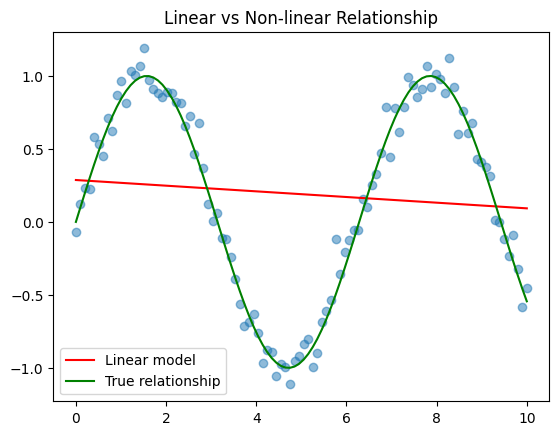

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Generate non-linear data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.1, 100)

# Fit linear model
linear_model = LinearRegression().fit(X, y)
r2_linear = r2_score(y, linear_model.predict(X))

# Calculate R-squared for non-linear relationship
r2_nonlinear = r2_score(y, np.sin(X).flatten())

print(f"R-squared (linear model): {r2_linear:.4f}")
print(f"R-squared (true non-linear relationship): {r2_nonlinear:.4f}")

# Plot data and models
plt.scatter(X, y, alpha=0.5)
plt.plot(X, linear_model.predict(X), color='red', label='Linear model')
plt.plot(X, np.sin(X), color='green', label='True relationship')
plt.legend()
plt.title("Linear vs Non-linear Relationship")
plt.show()

Slide 8: Limitation 7 - Lack of Information on Residuals

R-squared and Residual Analysis

R-squared doesn't provide information about the distribution of residuals, which is crucial for assessing model assumptions. A high R-squared doesn't guarantee that residuals are normally distributed or have constant variance. Let's create an example where R-squared is high, but residuals show heteroscedasticity.

R-squared: 0.5946


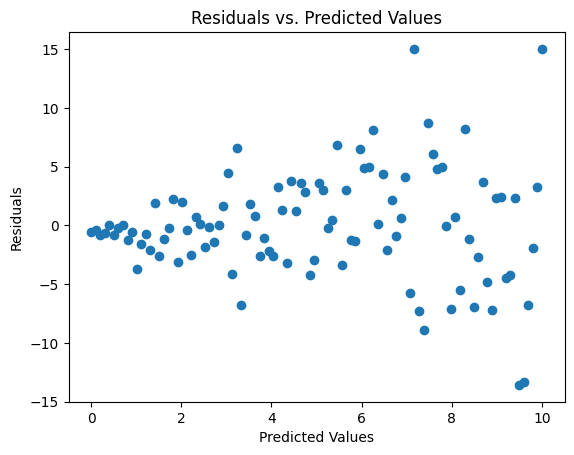

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Generate heteroscedastic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.flatten() + np.random.normal(0, X.flatten(), 100)

# Fit model and calculate R-squared
model = LinearRegression().fit(X, y)
r2 = r2_score(y, model.predict(X))

# Calculate residuals
residuals = y - model.predict(X).flatten()

print(f"R-squared: {r2:.4f}")

# Plot residuals
plt.scatter(X, residuals)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Slide 9: Limitation 8 - Comparison Across Different Datasets

R-squared and Dataset Comparisons

R-squared values are not directly comparable across different datasets or dependent variables. A model with a lower R-squared might perform better on new data than a model with a higher R-squared trained on a different dataset. This limitation emphasizes the importance of considering the specific context and goals of the analysis.

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Generate two datasets
np.random.seed(42)
X1 = np.random.rand(100, 1)
y1 = 2 * X1 + np.random.normal(0, 0.5, (100, 1))

X2 = np.random.rand(100, 1)
y2 = 5 * X2 + np.random.normal(0, 2, (100, 1))

# Fit models and calculate R-squared and MSE
model1 = LinearRegression().fit(X1, y1)
r2_1 = r2_score(y1, model1.predict(X1))
mse_1 = mean_squared_error(y1, model1.predict(X1))

model2 = LinearRegression().fit(X2, y2)
r2_2 = r2_score(y2, model2.predict(X2))
mse_2 = mean_squared_error(y2, model2.predict(X2))

print(f"Dataset 1 - R-squared: {r2_1:.4f}, MSE: {mse_1:.4f}")
print(f"Dataset 2 - R-squared: {r2_2:.4f}, MSE: {mse_2:.4f}")

Dataset 1 - R-squared: 0.5765, MSE: 0.2016
Dataset 2 - R-squared: 0.4431, MSE: 3.1793


Slide 10: Limitation 9 - Insensitivity to Predictor Importance

R-squared and Feature Importance

R-squared doesn't provide information about the relative importance of individual predictors. A high R-squared doesn't indicate which variables are most influential in the model. To address this limitation, we can use techniques like feature importance or partial dependence plots. Let's demonstrate this using a simple multiple regression model.

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Generate sample data
X = np.random.rand(100, 3)
y = 2*X[:, 0] + 0.5*X[:, 1] + 0.1*X[:, 2] + np.random.normal(0, 0.1, 100)

# Fit model and calculate R-squared
model = LinearRegression().fit(X, y)
r2 = r2_score(y, model.predict(X))

print(f"R-squared: {r2:.4f}")

# Calculate feature importance
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

for i, importance in enumerate(perm_importance.importances_mean):
    print(f"Feature {i+1} importance: {importance:.4f}")

R-squared: 0.9696
Feature 1 importance: 1.6938
Feature 2 importance: 0.1502
Feature 3 importance: 0.0066


Slide 11: Limitation 10 - Assumption of Constant Variance

R-squared and Homoscedasticity

R-squared assumes homoscedasticity (constant variance) of residuals. When this assumption is violated, R-squared may not accurately represent the model's goodness of fit. Let's create an example where R-squared is high, but the homoscedasticity assumption is violated.

R-squared: 0.8078


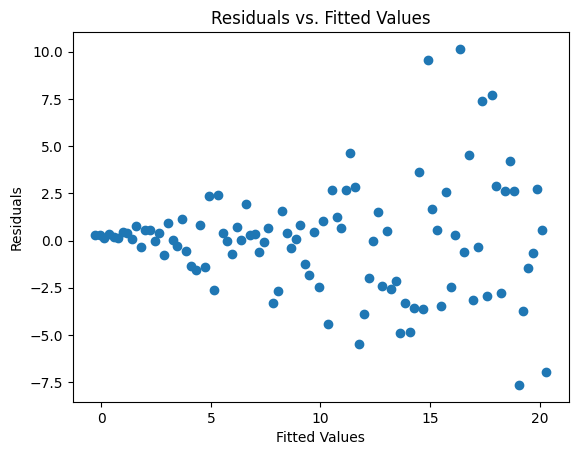

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Generate heteroscedastic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.flatten() + np.random.normal(0, 0.5 * X.flatten(), 100)

# Fit model and calculate R-squared
model = LinearRegression().fit(X, y)
r2 = r2_score(y, model.predict(X))

print(f"R-squared: {r2:.4f}")

# Plot residuals
residuals = y - model.predict(X).flatten()
plt.scatter(model.predict(X), residuals)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

Slide 12: Limitation 11 - Sensitivity to Influential Points

R-squared and Influential Points

R-squared can be disproportionately affected by influential points, which are observations that have a large impact on the regression line. These points can lead to misleading R-squared values. Let's demonstrate this by comparing R-squared with and without an influential point.

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Add an influential point
X_influential = np.vstack([X, [20]])
y_influential = np.append(y, [60])

# Fit models and calculate R-squared
model = LinearRegression().fit(X, y)
r2_normal = r2_score(y, model.predict(X))

model_influential = LinearRegression().fit(X_influential, y_influential)
r2_influential = r2_score(y_influential, model_influential.predict(X_influential))

print(f"R-squared (normal): {r2_normal:.4f}")
print(f"R-squared (with influential point): {r2_influential:.4f}")

R-squared (normal): 1.0000
R-squared (with influential point): 0.9564


Slide 13: Limitation 12 - Lack of Information on Model Complexity

R-squared and Model Complexity

R-squared doesn't provide information about model complexity. A more complex model might have a higher R-squared but could be overfitting the data. To address this, we can use adjusted R-squared, which penalizes the addition of unnecessary predictors. Let's compare R-squared and adjusted R-squared for models with different numbers of predictors.

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 5)
y = 2*X[:, 0] + 0.5*X[:, 1] + np.random.normal(0, 0.1, 100)

# Fit models with different numbers of predictors
r2_values = []
adj_r2_values = []

for i in range(1, 6):
    model = LinearRegression().fit(X[:, :i], y)
    r2 = r2_score(y, model.predict(X[:, :i]))
    adj_r2 = adjusted_r2(r2, len(y), i)
    
    r2_values.append(r2)
    adj_r2_values.append(adj_r2)
    
    print(f"Predictors: {i}, R-squared: {r2:.4f}, Adjusted R-squared: {adj_r2:.4f}")

Predictors: 1, R-squared: 0.9117, Adjusted R-squared: 0.9108
Predictors: 2, R-squared: 0.9666, Adjusted R-squared: 0.9659
Predictors: 3, R-squared: 0.9671, Adjusted R-squared: 0.9661
Predictors: 4, R-squared: 0.9671, Adjusted R-squared: 0.9658
Predictors: 5, R-squared: 0.9674, Adjusted R-squared: 0.9657


Slide 14: Real-life Example 1 - House Price Prediction

R-squared in House Price Prediction

In real estate, R-squared is often used to evaluate models predicting house prices. However, relying solely on R-squared can be misleading. Let's create a simple house price prediction model and examine its limitations.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Generate synthetic house data
np.random.seed(42)
size = np.random.randint(1000, 5000, 1000)
age = np.random.randint(0, 50, 1000)
location = np.random.randint(1, 10, 1000)
price = 100000 + 100 * size - 2000 * age + 50000 * location + np.random.normal(0, 50000, 1000)

X = np.column_stack((size, age, location))
y = price

# Split data and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Calculate metrics
r2 = r2_score(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")

R-squared: 0.9443
Mean Absolute Error: $35478.36


Slide 15: Real-life Example 2 - Stock Market Prediction

Limitations of R-squared in Stock Market Prediction

In finance, R-squared is sometimes used to evaluate stock market prediction models. However, its limitations become apparent in this volatile domain. Let's create a simple stock price prediction model to illustrate why R-squared alone is insufficient.

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Generate synthetic stock data
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
price = 100 + np.cumsum(np.random.normal(0, 1, len(dates)))
volume = np.random.randint(1000000, 10000000, len(dates))

df = pd.DataFrame({'Date': dates, 'Price': price, 'Volume': volume})
df['PreviousPrice'] = df['Price'].shift(1)
df['PriceChange'] = df['Price'] - df['PreviousPrice']
df = df.dropna()

X = df[['PreviousPrice', 'Volume']]
y = df['Price']

# Fit model and calculate R-squared
model = LinearRegression().fit(X, y)
r2 = r2_score(y, model.predict(X))

print(f"R-squared: {r2:.4f}")

# Calculate daily returns
df['DailyReturn'] = df['PriceChange'] / df['PreviousPrice']
print(f"Volatility (std of daily returns): {df['DailyReturn'].std():.4f}")

R-squared: 0.9691
Volatility (std of daily returns): 0.0100


Slide 16: Additional Resources

Further Reading on R-squared Limitations

To deepen your understanding of R-squared limitations and alternative metrics, consider exploring these resources:

1. "The Dangers of R-squared" by Frost, J. (2020) - A comprehensive discussion on R-squared pitfalls.
2. "Beyond R-squared: New Metrics for Regression Models" by Kvålseth, T. O. (2015) - Explores alternative goodness-of-fit measures.
3. "The Coefficient of Determination R-Squared Is More Informative than SMAPE, MAE, MAPE, MSE and RMSE in Regression Analysis Evaluation" by Alexander, D. L. J., Tropsha, A., & Winkler, D. A. (2015) - ArXiv:1511.02513 \[stat.ML\]

These resources provide in-depth analyses of R-squared limitations and suggest alternative approaches for model evaluation in various contexts.